In [1]:
import pandas as pd

df = pd.read_csv("/prj/Qingyang/BID_seq_HEK293T.bed", sep="\t", low_memory=False)


In [2]:
print(df.shape)

(519, 8)


In [3]:
print(df.head())

  chrom  chromStart  chromEnd name  score strand ref5mer  BID-Seq
0     1     1045780   1045781  psi    7.7      +   GATGA     12.4
1     1     1051519   1051520  psi   23.4      +   CTTTG     73.3
2     1     1082417   1082418  psi   63.9      -   GTTCC     90.5
3     1     1254956   1254957  psi   13.1      -   TGTAG     45.5
4     1     1336109   1336110  psi    9.3      -   GGTGG     12.4


In [4]:
import logomaker
import matplotlib.pyplot as plt
sequences = df["ref5mer"]

In [5]:
import pandas as pd

cleaned_sequences = []
invalid_count = 0

for seq in sequences:
    if isinstance(seq, str):
        cleaned_sequences.append(seq)
    else:
        invalid_count += 1
        cleaned_sequences.append('NNNNN')  

print(f"Found {invalid_count} illegal sequences, replaced with 'N'.")

filtered_sequences = [seq for seq in cleaned_sequences if 'N' not in seq]

print(f"After filtering, {len(filtered_sequences)} legal sequences remain for drawing.")

发现 0 个非法序列，已用 'N' 代替。
过滤后剩余 519 个合法序列用于绘图。


In [6]:
info_matrix = logomaker.alignment_to_matrix(filtered_sequences, to_type="information")

<Figure size 1000x400 with 0 Axes>

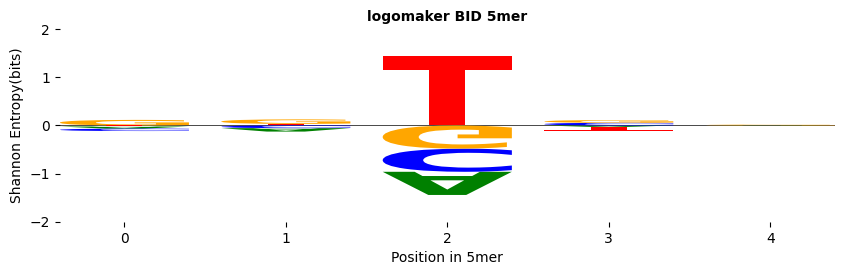

In [7]:
plt.figure(figsize=(10, 4))
logo = logomaker.Logo(info_matrix, center_values=True, width=0.8)
logo.ax.set_ylabel("Information Content (bits)")
logo.ax.set_ylabel("Shannon Entropy(bits)")
logo.ax.set_xlabel("Position in 5mer")
logo.ax.set_title("logomaker BID 5mer", fontsize=10, fontweight='bold')
logo.ax.set_xticks(range(len(info_matrix)))
logo.ax.set_xticklabels(range(1, len(info_matrix) + 1))
logo.ax.set_ylim([-2, 2])
logo.style_spines(visible=False)
logo.style_xticks(rotation=0, fmt="%d", anchor=0)
logo.style_glyphs(fade_below=0.2)

In [9]:
counts_matrix = logomaker.alignment_to_matrix(filtered_sequences)
print(counts_matrix.head)

<bound method NDFrame.head of       A    C    G    T
pos                   
0    65   56  299   99
1    32   53  259  175
2     0    0    0  519
3    88  209  209   13
4    96  117  217   89>


In [10]:
info_matrix = logomaker.alignment_to_matrix(filtered_sequences, to_type='information')

Text(0.5, 1.0, '5mer BID')

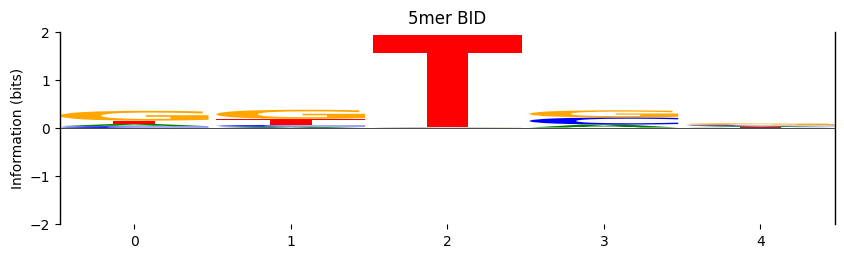

In [11]:
logo = logomaker.Logo(info_matrix, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines = ["left", "right"], visible=True)
logo.ax.set_ylabel("Information (bits)")
logo.ax.set_ylim([-2, 2])
plt.title('5mer BID')

Text(0.5, 1.0, '5mer BID')

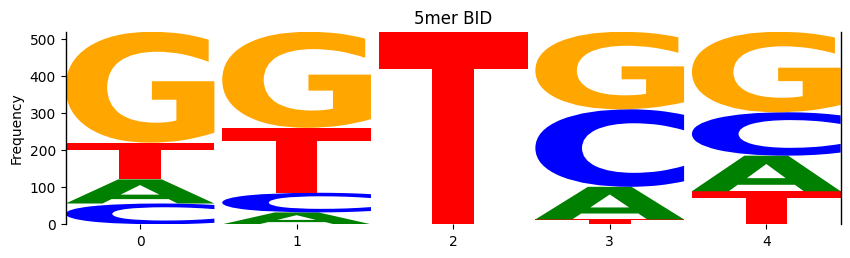

In [12]:
logo = logomaker.Logo(counts_matrix, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines = ["left", "right"], visible=True)
logo.ax.set_ylabel("Frequency")
plt.title('5mer BID')

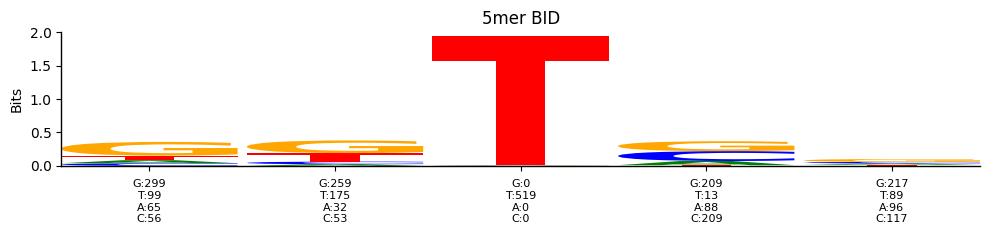

In [14]:
five_mers = df['ref5mer'].dropna().tolist()

info_matrix = logomaker.alignment_to_matrix(sequences=five_mers, to_type='information')

logo = logomaker.Logo(info_matrix, color_scheme='classic')

logo.ax.set_ylabel("Bits")
logo.ax.set_ylim([0, 2])

logo.ax.set_xticks([0, 1, 2, 3, 4])
logo.ax.set_xticklabels(['1', '2', '3', '4', '5'])
logo.ax.set_xticklabels([])

logo.style_spines(visible=False)
logo.style_spines(spines=["left", "bottom"], visible=True)

counts_matrix = logomaker.alignment_to_matrix(sequences=five_mers, to_type='counts')

for pos in range(5):
    g_count = counts_matrix.loc[pos, 'G'] if 'G' in counts_matrix.columns else 0
    t_count = counts_matrix.loc[pos, 'T'] if 'T' in counts_matrix.columns else 0
    a_count = counts_matrix.loc[pos, 'A'] if 'A' in counts_matrix.columns else 0
    c_count = counts_matrix.loc[pos, 'C'] if 'C' in counts_matrix.columns else 0
    text = f"G:{g_count}\nT:{t_count}\nA:{a_count}\nC:{c_count}"
    logo.ax.text(pos, -0.2, text, ha='center', va='top', fontsize=8, transform=logo.ax.transData)

plt.title("5mer BID")

plt.tight_layout()
plt.show()